**Code reviewer**

¡Hola en esta nueva aventura!

Mi nombre es **Ivan Hernandez** y seré tu revisor de código para este proyecto.

Revisaré todo el cuaderno con preguntas o comentarios dejados atrás. Te animo a responder los comentarios con cualquier duda o solución a la recomendación o problema presentado **(con la celda en color azul)**, esa es la mejor manera de entender y aprender en este nuevo mundo de datos y programación. Seguiré la misma lista de verificación y los mismos pasos en los criterios de evaluación del proyecto.

 Importante, <span style="color:red">por favor no cambies mis comentarios</span>, es una buena forma de seguir tu aprendizaje por mí y otros revisores de código y finalmente, pongo un ejemplo del color del código y su significado.

<div class="alert alert-success">
<h1> Comentarios del revisor </h1>
Excelente trabajo y ejecución
</div>

<div class="alert alert-warning">
<h1> Comentarios del revisor </h1>
Comentario no crítico; si hay menos de tres de tales comentarios, el proyecto puede aceptarse sin su refinamiento.</div>

<div class="alert alert-danger">
<h1> Comentarios del revisor </h1>
Error que debe corregirse, de lo contrario el proyecto no será aceptado.
</div>

<div class="alert alert-info">
<h1> Comentarios del estudiante</h1>
Comentario de ejemplo
</div>

# Proyecto Sprint 9

Como empleado de la compañía minera OilyGiant, mi tarea es encontrar el mejor lugar para un nuevo pozo petrolero. Para lograr esto, cuento con datos sobre muestras de crudo de tres regiones y los parámetros de cada pozo petrolero de la región. 

Para crear un modelo que me ayude a elegir la región con el mayor margen de beneficio, utilizaré diversas técnicas estadísticas y de análisis de datos. Una de estas técnicas será el bootstrapping, que me permitirá evaluar los riesgos y beneficios potenciales de cada región.

Una vez que haya recopilado y analizado los datos, podré determinar la región que presenta el mayor margen de beneficio y, por lo tanto, es la mejor opción para la compañía OilyGiant. Además, gracias al bootstrapping, habré podido evaluar los riesgos potenciales y tomar medidas para mitigarlos.

En resumen, mi objetivo como empleado de OilyGiant es utilizar técnicas estadísticas y de análisis de datos para identificar la mejor ubicación para un nuevo pozo petrolero. Gracias al bootstrapping, podré evaluar los riesgos y beneficios potenciales de cada región y tomar una decisión informada.

## Importacion de librerias y visualizacion de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from scipy import stats as st

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')

data_1 = pd.read_csv('/datasets/geo_data_1.csv')

data_2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
#Veamos el primer dataframe
print(data_0.info())
data_0.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [4]:
#Veamos si tiene valores duplicados
print(data_0.duplicated().sum())

#Veamos si tiene valores ausentes
print(data_0.isna().sum())

0
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [5]:
#Visualizemos
data_0

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


In [6]:
#Repetimos el proceso con los otros dos dataframes
print(data_1.info())
data_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [7]:
#Veamos si tiene valores duplicados
print(data_1.duplicated().sum())

#Veamos si tiene valores ausentes
print(data_1.isna().sum())

0
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [8]:
#Imprimimos una muestra
data_1

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


In [9]:
print(data_2.info())
data_2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [10]:
#Veamos si tiene valores duplicados
print(data_2.duplicated().sum())

#Veamos si tiene valores ausentes
print(data_2.isna().sum())

0
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [11]:
#Imprimimos una muestra
data_2

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


Vemos que los datasets no tienen datos conflictivos o problematicos, lo cual facilita los siguientes procesos de analisis de modelo, metricas, etc. Todos tienen una varianza similar, por lo que no parece tener problemas de balance de clases.

<div class="alert alert-success">
<h1> Comentarios del revisor </h1>

Muy buen trabajo!
</div>

## Analisis para modelos, separacion de conjuntos

In [12]:
#Eliminamos la columna "id", pues no proporciona datos relevantes para la investigacion
data_0 = data_0.drop(['id'], axis=1)

data_1 = data_1.drop(['id'], axis=1)

data_2 = data_2.drop(['id'], axis=1)

Model 0 coefficients: [  3.83225372 -14.26047297   6.59357294]
Mean squared error for model 0: 1425.5608700093808
R-squared value for model 0: 0.2728287328173472
Rmse value for model0: 37.756600350261685
Mean of predicted values for model 0: 92.3987999065777


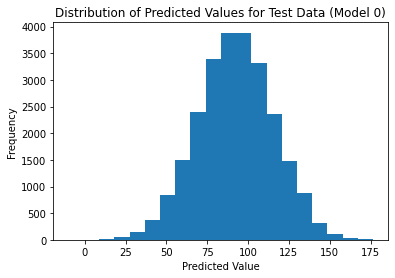

Model 1 coefficients: [-1.44912960e-01 -2.16715104e-02  2.69531092e+01]
Mean squared error for model 1: 0.7925986566392013
R-squared value for model 1: 0.9996245232002449
Rmse value for model1: 0.890280100102884
Mean of predicted values for model 1: 68.71287803913762


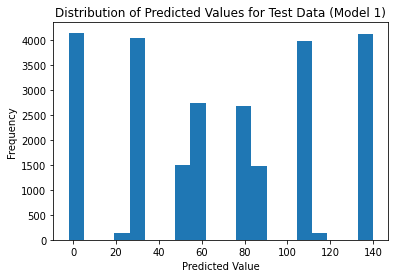

Model 2 coefficients: [-0.08415777 -0.01546094  5.75011968]
Mean squared error for model 2: 1611.6910636385905
R-squared value for model 2: 0.19634705977280464
Rmse value for model2: 40.14587231134218
Mean of predicted values for model 2: 94.77102387765939


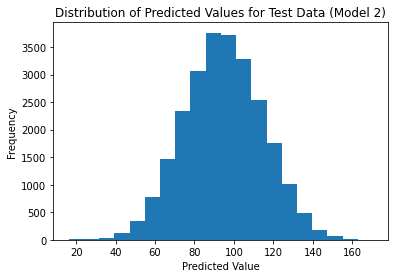

In [13]:
dataframes = [data_0, data_1, data_2]

pred = []
target = []

for i, df in enumerate([data_0, data_1, data_2]):
    
    #Dividimos en un set de entrenamiento y prueba
    train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

    #Dividimos el conjunto de entrenamiento en target y features
    X_train = train_data.drop(['product'], axis=1)
    y_train = train_data['product']

    #Dividimos el conjunto de prueba en target y features
    X_test = test_data.drop(['product'], axis=1)
    y_test = test_data['product']

    #Entrenamos un modelo de regresion linear con los datos de entrenamiento
    model = LinearRegression().fit(X_train, y_train)

    #Usamos el modelo de entrenamiento para hacer predicciones
    y_pred = model.predict(X_test)

    #Calculamos el error cuadratico medio y el r2 score
    mse = mean_squared_error(y_test, y_pred)
    r2 = model.score(X_test, y_test)
    rmse = np.sqrt(mse)
    
    #Imprimimos los coefficientes para cada dataframes, el mse y r2 score
    print(f'Model {i} coefficients:', model.coef_)
    print(f'Mean squared error for model {i}:', mse)
    print(f'R-squared value for model {i}:', r2)
    print(f'Rmse value for model{i}:', rmse)
    
    #Calculamos la media de las predicciones
    pred_mean = np.mean(y_pred)
    print(f'Mean of predicted values for model {i}: {pred_mean}')
    
    #Hacemos un grafico de las predicciones
    plt.hist(y_pred, bins=20)
    plt.title(f'Distribution of Predicted Values for Test Data (Model {i})')
    plt.xlabel('Predicted Value')
    plt.ylabel('Frequency')
    plt.show()
    
    #Agregamos los predicciones y respuestas validas
    pred.append(pd.Series(y_pred))
    target.append((y_test))

In [14]:
predictions_0 = pred[0]
target_0 = target[0].reset_index(drop=True)
predictions_1 = pred[1]
target_1 = target[1].reset_index(drop=True)
predictions_2 = pred[2]
target_2 = target[2].reset_index(drop=True)

In [15]:
#Calculamos la raiz de error cuadratico medio
best_rmse = np.sqrt(mean_squared_error(predictions_1, target_1))

#Mostramos
print('RMSE:', best_rmse)

RMSE: 0.890280100102884


Vemos que el modelo del dataframe 1 tuvo mejores resultados que el resto, e inclusive tiene resultados muy optimos, pues tiene un r2_score que se acerca bastante a 1 y error cuadratico medio que es reducido. Los otros dos resultados de los modelos dan a entender que pueden haber muchos valores altos, hiperparametros, etc. que reducen la precision de las respuestas de los modelos.

<div class="alert alert-success">
<h1> Comentarios del revisor </h1>

Excelente trabajo aplicando los modelos! 
</div>

## Calculo de ganancias

In [16]:
#Creamos las variables con valores clave
budget = 100000000
budget_per_unit = budget / 200
revenue = 4500
min_volume = budget_per_unit / revenue
risk = 0.025
min_volume

111.11111111111111

Vemos que el volumen minimo para que no hayan perdidas es de 111.111 en producto.

In [17]:
#Sacamos el valor medio de los datasets
product_0 = data_0.loc[:, 'product'].sort_values(ascending=False)
mean_0 = product_0.mean()

product_1 = data_1.loc[:, 'product'].sort_values(ascending=False)
mean_1 = product_1.mean()

product_2 = data_2.loc[:, 'product'].sort_values(ascending=False)
mean_2 = product_2.mean()

#Mostramos
print(mean_0)
print(mean_1)
print(mean_2)

92.50000000000001
68.825
95.0


Vemos que ninguna de las medias de los pozos cumple con el volumen minimo, por lo que vamos a ver los valores mas altos para darnos una idea de cuales cumplen el volumen que se necesita

In [18]:
print(product_0.head())
print(product_1.head())
print(product_2.head())

8826     185.364347
99818    185.362690
94175    185.355615
1925     185.354980
45291    185.352015
Name: product, dtype: float64
53864    137.945408
97083    137.945408
88340    137.945408
64879    137.945408
7288     137.945408
Name: product, dtype: float64
79705    190.029838
93444    190.013589
35099    190.011722
21943    190.010982
37870    190.010029
Name: product, dtype: float64


Sin embargo al ver los productos, vemos que si hay pozos que cumplen las condiciones. Por lo tanto vamos a seguir con el calculo de ganancias.

<div class="alert alert-success">
<h1> Comentarios del revisor </h1>

Buen trabajo!</div>

## Calculo de ganancias

In [19]:
#Hagamos una funcion que nos pueda devolver el calculo de ganancias
def profit(target, product, count): #Escogemos el target, predicciones(product), y numero de muestras
    product_sorted = product.sort_values(ascending=False) #Ordenamos las predicciones
    selected = target[product_sorted.index][:count] #Escogemos aquellos target que contengan el indice de las predicciones, y dejamos un contador
    return revenue * sum(selected)-budget #Hacemos que nos devuelva el profit usando los valores previstos

In [20]:
#Hacemos una funcion que nos de el bootstrap, con el intervalo de confianza
def bootstrap(sample, tar, state, predictions): #Escogemos como parametros las muestras, target, state y predicciones
    profits = [] #Creamos una lista donde se almacenaran las ganancias
    for i in range(sample): #Hacemos un bucle para sample
        target_undersample = tar.sample(n=500, replace=True, random_state = state) #Creamos una muestra de 500
        pred_undersample = predictions[target_undersample.index] #Hacemos las predicciones con indice de target
        profits.append(profit(target_undersample, pred_undersample, 200)) #Usamos la funcion de ganancias con el target definido, predicciones definidos, en los top 200
    profits = pd.Series(profits) #Transformamos el profit en pd.Series()
    profits_mean = profits.mean() #Sacamos el promedio de ganancias
                       
    lower_quantile = profits.quantile(0.025) #Sacamos el intervalo de confianza de 95%
    upper_quantile = profits.quantile(0.975)
                       
    loss = (profits < 0).mean() #Sacamos el riesgo de perdida 
    
    return profits_mean, lower_quantile, upper_quantile, loss #Regresa los valores pedidos

In [21]:
sample = 1000 #Creamos una muestra de 1000
n = 0
state = np.random.RandomState(12345) #Escogemos un random_state fijo

for tar, predictions in zip([target_0, target_1, target_2], pred): #Iteramos sobre target y predicciones
    profits_mean, lower_quantile, upper_quantile, loss = bootstrap(sample, tar, state, predictions) #Usamos la funcion de bootstrap


                       
#Imprimimos                       
    print('Region:', n)
    print('Profit mean:', profits_mean)
    print(f'Loss risk: {loss:.02%}')
    print('Trust interval from', lower_quantile, 'to', upper_quantile)
    n += 1

Region: 0
Profit mean: 4359337.721386622
Loss risk: 6.10%
Trust interval from -1162316.1277721308 to 9665041.807073694
Region: 1
Profit mean: 4985690.169168114
Loss risk: 1.00%
Trust interval from 753155.730889945 to 9115036.950245844
Region: 2
Profit mean: 4126728.989885312
Loss risk: 7.00%
Trust interval from -1589395.1576360438 to 9781912.017001864


Vemos que la region con menos probabilidad de perdida de la region numero 1. Aunque no es la que tiene mas posibilidad de tener las ganancias mas altas, pues la region que destaca en esta area es la numero 2.

<div class="alert alert-success">
<h1> Comentarios del revisor </h1>

Impecable el trabajo!

</div>

# Conclusion Final

Finalmente podemos hacer las conclusiones segun lo observado. Primero vimos que el modelo con mejor rendimiento fue el que trabajo con el dataset numero 1 (data_1). Tras guardar predicciones, sacar valores medios, y medidas de precision se pudo concluir que este dio resultados optimos.

Luego declaramos las variables que iban a ser necesitadas en lo que se refiere a calculos de ganancias, es decir, estabamos preparandonos para este paso.

Finalmente hicimos dos funciones: Profit y bootstrap.

Profit nos ayudaba consiguiendo el numero de ganancias refiriendonos en el objetivo (respuestas correctas) y predicciones hechas por el modelo. A esto tambien se le usa o aplica las variables declaradas en el paso anterior.

Bootstrap nos ayuda para sacar un numero de muestras (samples = 1000) con un intervalo de confianza del 95%, el porcentaje de riesgo con la inversion, y un promedio de ganancias.

Finalmente con los resultados puedo concluir que la region mas optima para hacer inversion es la numero 1, por los siguientes motivos: Tiene un nivel de riesgo minimo, e inclusive se demuestra que los intervalos de confianza son positivos, mientras que las otras regiones tienen un nivel de riesgo mayor y intervalos de confianza desde valores negativos. Y para finalizar guiandonos tambien en el modelo se puede confiar mas en las predicciones de este, pues las medidas de precision ayudan a confirmar que estas tienen cercania a las respuestas validas.

<div class="alert alert-success">
<h1> Comentarios del revisor </h1>

Muy buen proyecto en general, felicitaciones por cumplir todos los puntos!

</div>